## Read SEG-Y with `obspy`

Before going any further, you might like to know, [What is SEG-Y?](http://www.agilegeoscience.com/blog/2014/3/26/what-is-seg-y.html). See also the articles in [SubSurfWiki](http://www.subsurfwiki.org/wiki/SEG_Y) and [Wikipedia](https://en.wikipedia.org/wiki/SEG_Y).

We'll use the [obspy](https://github.com/obspy/obspy) seismology library to read and write SEGY data.
    
Technical SEG-Y documentation:

* [SEG-Y Rev 1](http://seg.org/Portals/0/SEG/News%20and%20Resources/Technical%20Standards/seg_y_rev1.pdf)
* [SEG-Y Rev 2 proposal](https://www.dropbox.com/s/txrqsfuwo59fjea/SEG-Y%20Rev%202.0%20Draft%20August%202015.pdf?dl=0) and [draft repo](http://community.seg.org/web/technical-standards-committee/documents/-/document_library/view/6062543)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls -l ../data/*.sgy

-rw-rw-r--@ 1 matt  staff  3811416128 12 Jun  2015 ../data/3D_gathers_pstm_nmo_X1001.sgy
-rw-r--r--@ 1 matt  staff      256732 27 Aug  2015 ../data/F3_very_small.sgy
-rw-r--r--@ 1 matt  staff    48281760 28 Aug  2015 ../data/HUN00-ALT-01_STK.sgy
-rw-r--r--@ 1 matt  staff   474438768 25 Aug  2015 ../data/Penobscot.sgy
-rw-r--r--@ 1 matt  staff   359620364 12 Sep  2016 ../data/Penobscot_0-1000ms.sgy
-rw-r--r--@ 1 matt  staff    48281760 14 Apr  2017 ../data/out.sgy


## 2D data

In [3]:
filename = '../data/HUN00-ALT-01_STK.sgy'

In [4]:
from obspy.io.segy.segy import _read_segy
section = _read_segy(filename)

# OPTIONS
# headonly=True — only reads the header info, then you can index in on-the-fly.
# unpack_headers=True — slows you down here and isn't really required.

In [5]:
data = np.vstack([t.data for t in section.traces])

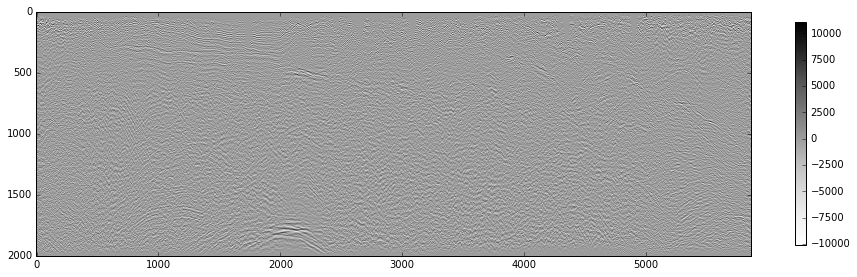

In [6]:
plt.figure(figsize=(16,8))
plt.imshow(data.T, cmap="Greys")
plt.colorbar(shrink=0.5)
plt.show()

In [7]:
section.traces[0]

Trace sequence number within line: 1
2000 samples, dtype=float32, 1000.00 Hz

In [8]:
section.textual_file_header

b'C01  PROCESSED BY: VERITAS GEOSERVICES LTD.                                     C02  CLIENT      : HUNT OIL COMPANY                                             C03  AREA        : ALTON                                                        C04  LINE        : ALT-01                                                       C05  DATA   NOISE ATTENUATED STRUCTURE STACK                                    C06         (FILTERED/SCALED)                                                   C07                                                                             C08                                                                             C09  SAMPLE RATE   2 MS.                                                        C10  FIELD DATA LENGTH 3.0 SEC.; (PROCESSED TO 2.0 SEC)                         C11  PROCESSING SEQUENCE:                                                       C12  DEMULTIPLEX:SAMPLE RATE:1 MS RECORD LEN.:3 SEC.S                           C13  GEOMETRY                         

Aargh... 

OK, fine, we'll reformat this.

In [9]:
def chunk(string, width=80):
    try:
        # Make sure we don't have a ``bytes`` object.
        string = string.decode()
    except:
        # String is already a string, carry on.
        pass
    lines = int(np.ceil(len(string) / width))
    result = ''
    for i in range(lines):
        line = string[i*width:i*width+width]
        result += line + (width-len(line))*' ' + '\n'
    return result

s = section.textual_file_header.decode()
print(chunk(s))

C01  PROCESSED BY: VERITAS GEOSERVICES LTD.                                     
C02  CLIENT      : HUNT OIL COMPANY                                             
C03  AREA        : ALTON                                                        
C04  LINE        : ALT-01                                                       
C05  DATA   NOISE ATTENUATED STRUCTURE STACK                                    
C06         (FILTERED/SCALED)                                                   
C07                                                                             
C08                                                                             
C09  SAMPLE RATE   2 MS.                                                        
C10  FIELD DATA LENGTH 3.0 SEC.; (PROCESSED TO 2.0 SEC)                         
C11  PROCESSING SEQUENCE:                                                       
C12  DEMULTIPLEX:SAMPLE RATE:1 MS RECORD LEN.:3 SEC.S                           
C13  GEOMETRY               

In [10]:
section.traces[0]

Trace sequence number within line: 1
2000 samples, dtype=float32, 1000.00 Hz

In [15]:
t = section.traces[0]

t.npts

2000

In [16]:
t.header

trace_sequence_number_within_line: 1
trace_sequence_number_within_segy_file: 1
original_field_record_number: 1
trace_number_within_the_original_field_record: 1
energy_source_point_number: 101000
ensemble_number: 1
trace_number_within_the_ensemble: 1
trace_identification_code: 2
number_of_vertically_summed_traces_yielding_this_trace: 0
number_of_horizontally_stacked_traces_yielding_this_trace: 0
data_use: 1
distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group: 0
receiver_group_elevation: 0
surface_elevation_at_source: 0
source_depth_below_surface: 0
datum_elevation_at_receiver_group: 0
datum_elevation_at_source: 0
water_depth_at_source: 0
water_depth_at_group: 0
scalar_to_be_applied_to_all_elevations_and_depths: 0
scalar_to_be_applied_to_all_coordinates: -10
source_coordinate_x: 4838911
source_coordinate_y: 49950729
group_coordinate_x: 4838911
group_coordinate_y: 49950729
coordinate_units: 0
weathering_velocity: 0
subweathering_velocity: 0
uphole_time_at_source_i

## 3D data

Either use the small volume, or **[get the large dataset from Agile's S3 bucket](https://s3.amazonaws.com/agilegeo/Penobscot_0-1000ms.sgy.gz)**

In [3]:
#filename = '../data/F3_very_small.sgy'
filename = '../data/Penobscot_0-1000ms.sgy'

In [4]:
from obspy.io.segy.segy import _read_segy

raw = _read_segy(filename)

In [5]:
data = np.vstack([t.data for t in raw.traces])

I happen to know that the shape of this dataset is 601 &times; 481.

In [6]:
_, t = data.shape
seismic = data.reshape((601, 481, t))

Note that we don't actually need to know the last dimension, if we already have two of the three dimensions. `np.reshape()` can compute it for us on the fly:

In [7]:
seismic = data.reshape((601, 481, -1))

Plot the result...

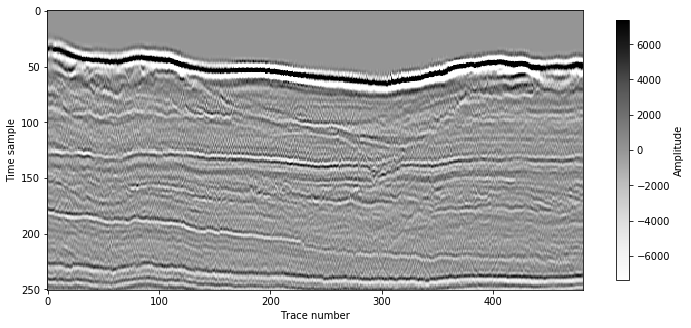

In [8]:
clip = np.percentile(seismic, 99)
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
plt.imshow(seismic[100,:,:].T, cmap="Greys", vmin=-clip, vmax=clip)
plt.colorbar(label="Amplitude", shrink=0.8)
ax.set_xlabel("Trace number")
ax.set_ylabel("Time sample")
plt.show()

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2016</p>
</div>